<a href="https://colab.research.google.com/github/seonghaiiiii/busan-car-accident/blob/main/car_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/대구교통사고/data/countrywide_accident.csv')

In [ ]:
train = train[train['시군구'].str.startswith('부산광역시')]

In [ ]:
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
11,COUNTRYWIDE_ACCIDENT_000011,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,기타,중앙선침범,...,상해없음,보행자,여,69세,사망,1,0,0,0,10
12,COUNTRYWIDE_ACCIDENT_000012,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,상해없음,이륜,남,32세,중상,0,1,0,0,5
30,COUNTRYWIDE_ACCIDENT_000030,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,상해없음,보행자,남,66세,중상,0,1,0,0,5
48,COUNTRYWIDE_ACCIDENT_000048,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,60세,경상,0,1,2,0,11
54,COUNTRYWIDE_ACCIDENT_000054,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,38세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,COUNTRYWIDE_ACCIDENT_602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,기타,안전운전불이행,...,상해없음,승용,남,59세,중상,0,1,1,0,8
602755,COUNTRYWIDE_ACCIDENT_602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,기타,안전운전불이행,...,부상신고,이륜,여,43세,경상,0,0,1,1,4
602758,COUNTRYWIDE_ACCIDENT_602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,승용,남,49세,경상,0,0,3,0,9
602769,COUNTRYWIDE_ACCIDENT_602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,자전거,여,57세,중상,0,1,0,0,5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           36244 non-null  object
 1   사고일시         36244 non-null  object
 2   요일           36244 non-null  object
 3   기상상태         36244 non-null  object
 4   시군구          36244 non-null  object
 5   도로형태         36244 non-null  object
 6   노면상태         36244 non-null  object
 7   사고유형         36244 non-null  object
 8   사고유형 - 세부분류  36244 non-null  object
 9   법규위반         36244 non-null  object
 10  가해운전자 차종     36244 non-null  object
 11  가해운전자 성별     36244 non-null  object
 12  가해운전자 연령     36244 non-null  object
 13  가해운전자 상해정도   36244 non-null  object
 14  피해운전자 차종     35033 non-null  object
 15  피해운전자 성별     35033 non-null  object
 16  피해운전자 연령     35033 non-null  object
 17  피해운전자 상해정도   35033 non-null  object
 18  사망자수         36244 non-null  int64 
 19  중상자수         36244 non-

In [ ]:
train_df = train[['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','법규위반','사망자수','중상자수','경상자수','부상자수','ECLO']]

In [ ]:
train_df

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO
11,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10
12,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5
30,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5
48,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11
54,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8
602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4
602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9
602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5


In [ ]:
# 시군구별 행의 개수를 구해서 '빈도' 열로 추가
train_df['빈도'] = train_df.groupby('시군구')['시군구'].transform('count')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_df

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도
11,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953
12,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132
30,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21
48,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544
54,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,953
602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,197
602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,344
602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,1570


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler(feature_range=(0, 10))

# '빈도' 열에 대해 스케일링 적용
train_df['빈도_scaled'] = scaler.fit_transform(train_df[['빈도']].values.reshape(-1, 1))



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# 'ECLO'와 '빈도_scaled'를 곱하여 '사고위험' 열 생성
train_df['사고위험'] = train_df['ECLO'] * train_df['빈도_scaled']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# '사고일시' 열을 datetime 타입으로 변환
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])

# '년도', '월', '일', '시간' 열 추가
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# '사고일시' 열 삭제
train_df = train_df.drop('사고일시', axis=1)

In [ ]:
train_df = train_df.drop('day', axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   요일         36244 non-null  object 
 1   기상상태       36244 non-null  object 
 2   시군구        36244 non-null  object 
 3   도로형태       36244 non-null  object 
 4   노면상태       36244 non-null  object 
 5   사고유형       36244 non-null  object 
 6   법규위반       36244 non-null  object 
 7   사망자수       36244 non-null  int64  
 8   중상자수       36244 non-null  int64  
 9   경상자수       36244 non-null  int64  
 10  부상자수       36244 non-null  int64  
 11  ECLO       36244 non-null  int64  
 12  빈도         36244 non-null  int64  
 13  빈도_scaled  36244 non-null  float64
 14  사고위험       36244 non-null  float64
 15  year       36244 non-null  int64  
 16  month      36244 non-null  int64  
 17  hour       36244 non-null  int64  
dtypes: float64(2), int64(9), object(7)
memory usage: 5.3+ MB


In [ ]:
train_df['사고위험'].describe()

count    36244.000000
mean        15.146743
std         16.373191
min          0.000000
25%          5.863607
50%         10.452518
75%         18.871893
max        436.150414
Name: 사고위험, dtype: float64

In [ ]:
def eclo_group(a):
    if a<=6:
        return 'safe'
    elif a<=18:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['사고위험_group'] = train_df['사고위험'].apply(eclo_group)
train_df['사고위험_group'].value_counts()

Cautionary    17221
dangerous      9850
safe           9173
Name: 사고위험_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','사고위험_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   시군구         36244 non-null  object
 3   도로형태        36244 non-null  object
 4   노면상태        36244 non-null  object
 5   사고유형        36244 non-null  object
 6   year        36244 non-null  int64 
 7   month       36244 non-null  int64 
 8   hour        36244 non-null  int64 
 9   사고위험_group  36244 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.0+ MB


In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['사고위험_group'],axis = 1)
train_y = train['사고위험_group']
test_x = test.drop(['사고위험_group'],axis = 1)
test_y = test['사고위험_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
# CatBoost 모델 import
from catboost import CatBoostClassifier

# 모델 학습
model = CatBoostClassifier(iterations=50, depth=5, learning_rate=0.1)
model.fit(x_train, y_train, verbose=1,cat_features=x_train.columns.tolist())

# 모델 학습
predictions = model.predict(test_x)

0:	learn: 1.0105211	total: 86.4ms	remaining: 4.24s
1:	learn: 0.9429522	total: 154ms	remaining: 3.69s
2:	learn: 0.8887978	total: 226ms	remaining: 3.55s
3:	learn: 0.8446936	total: 301ms	remaining: 3.46s
4:	learn: 0.8101185	total: 379ms	remaining: 3.41s
5:	learn: 0.7792061	total: 445ms	remaining: 3.26s
6:	learn: 0.7534763	total: 517ms	remaining: 3.18s
7:	learn: 0.7321500	total: 582ms	remaining: 3.06s
8:	learn: 0.7139616	total: 649ms	remaining: 2.96s
9:	learn: 0.6976775	total: 715ms	remaining: 2.86s
10:	learn: 0.6853057	total: 802ms	remaining: 2.84s
11:	learn: 0.6741831	total: 870ms	remaining: 2.75s
12:	learn: 0.6646694	total: 945ms	remaining: 2.69s
13:	learn: 0.6569046	total: 1.02s	remaining: 2.62s
14:	learn: 0.6491827	total: 1.08s	remaining: 2.53s
15:	learn: 0.6418547	total: 1.16s	remaining: 2.46s
16:	learn: 0.6363820	total: 1.23s	remaining: 2.38s
17:	learn: 0.6308187	total: 1.29s	remaining: 2.3s
18:	learn: 0.6265931	total: 1.35s	remaining: 2.21s
19:	learn: 0.6231004	total: 1.4s	remainin

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.75765684076788
macro F1 Score: 0.7550979527159208
Accuracy: 0.760921912624699
Macro Precision: 0.7742619696470959
              precision    recall  f1-score   support

  Cautionary       0.73      0.82      0.77      1381
   dangerous       0.78      0.59      0.67       783
        safe       0.81      0.83      0.82       743

    accuracy                           0.76      2907
   macro avg       0.77      0.75      0.76      2907
weighted avg       0.76      0.76      0.76      2907



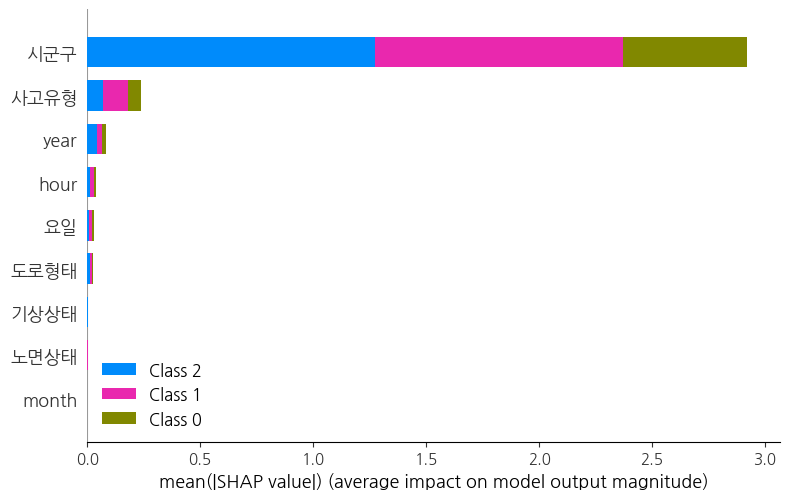

In [ ]:
import shap

# SHAP 값을 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x)

# SHAP summary plot
shap.summary_plot(shap_values, test_x)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_test.iloc[0, :])

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


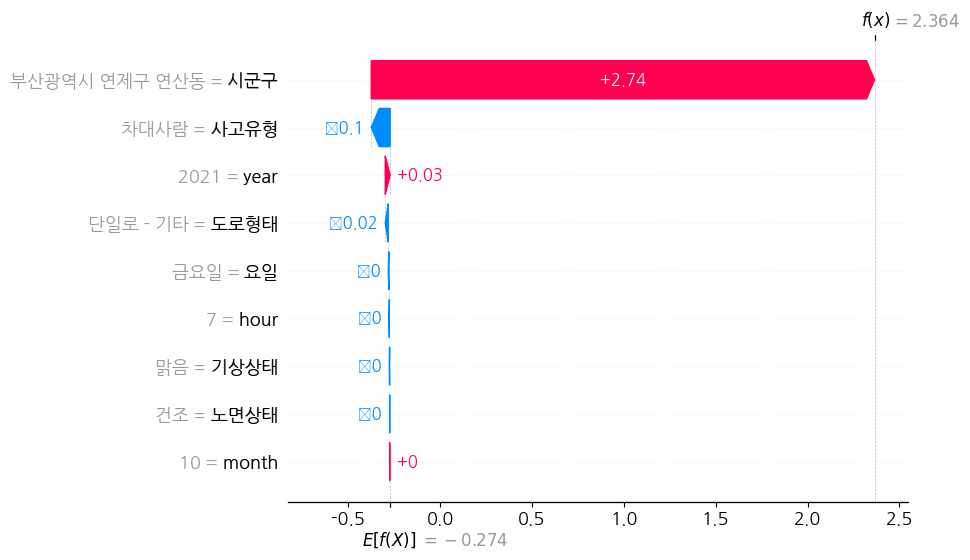

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=test_x.iloc[0,:]))


In [ ]:
#캣부 하이ㅠㅓㅠㅏ라미터어ㅓㅇ어

from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV

# 모델 정의
base_model = CatBoostClassifier(iterations=50, depth=5, learning_rate=0.1)

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'iterations': [100],
    'depth': [5, 9, 11],
    'learning_rate': [0.05, 0.2, 0.5]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy')

# 그리드 서치를 사용하여 모델 피팅
grid_search.fit(x_train, y_train, cat_features=x_train.columns.tolist(), verbose=1)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)


0:	learn: 1.0551417	total: 54.4ms	remaining: 5.38s
1:	learn: 1.0164061	total: 105ms	remaining: 5.15s
2:	learn: 0.9834147	total: 148ms	remaining: 4.78s
3:	learn: 0.9530184	total: 198ms	remaining: 4.76s
4:	learn: 0.9267278	total: 241ms	remaining: 4.58s
5:	learn: 0.9027533	total: 282ms	remaining: 4.41s
6:	learn: 0.8802305	total: 326ms	remaining: 4.33s
7:	learn: 0.8591273	total: 375ms	remaining: 4.31s
8:	learn: 0.8418623	total: 420ms	remaining: 4.25s
9:	learn: 0.8253059	total: 464ms	remaining: 4.17s
10:	learn: 0.8114088	total: 509ms	remaining: 4.12s
11:	learn: 0.7978112	total: 555ms	remaining: 4.07s
12:	learn: 0.7839244	total: 600ms	remaining: 4.01s
13:	learn: 0.7711387	total: 644ms	remaining: 3.96s
14:	learn: 0.7596530	total: 690ms	remaining: 3.91s
15:	learn: 0.7491109	total: 740ms	remaining: 3.88s
16:	learn: 0.7389998	total: 790ms	remaining: 3.85s
17:	learn: 0.7309462	total: 819ms	remaining: 3.73s
18:	learn: 0.7228582	total: 864ms	remaining: 3.68s
19:	learn: 0.7160746	total: 898ms	remain

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.7594022690066097
macro F1 Score: 0.7567616120775407
Accuracy: 0.7636738906088751
Macro Precision: 0.7789230266093338
              precision    recall  f1-score   support

  Cautionary       0.73      0.83      0.77      1381
   dangerous       0.80      0.58      0.67       783
        safe       0.81      0.85      0.83       743

    accuracy                           0.76      2907
   macro avg       0.78      0.75      0.76      2907
weighted avg       0.77      0.76      0.76      2907



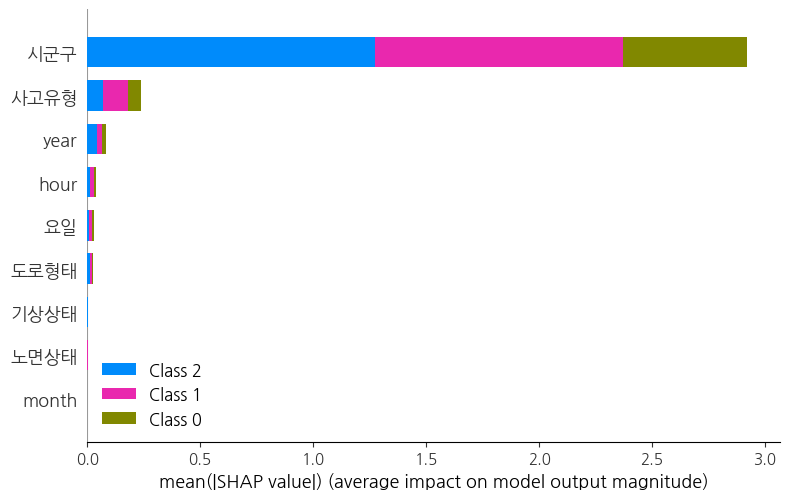

In [ ]:
import shap

# SHAP 값을 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x)

# SHAP summary plot
shap.summary_plot(shap_values, test_x)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_test.iloc[0, :])

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


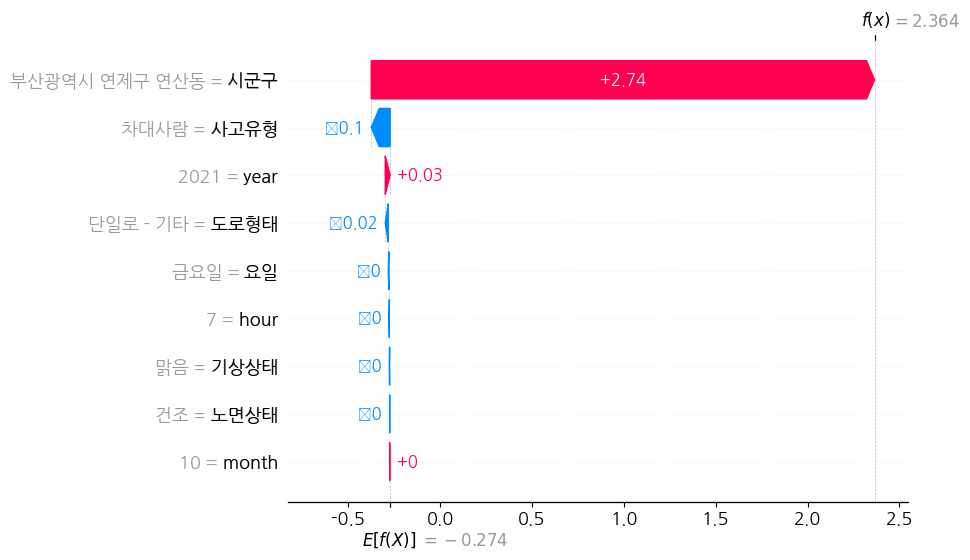

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=test_x.iloc[0,:]))


In [ ]:
# 일단 지금 하면

#XAI 시군구 뺴고 조지기


In [ ]:
train_df1

,요일,기상상태,시군구,도로형태,노면상태,사고유형,year,month,hour,사고위험_group
11,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,2019,1,0,dangerous
12,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,2019,1,0,dangerous
30,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,2019,1,1,safe
48,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,2019,1,2,dangerous
54,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,2019,1,3,Cautionary
...,...,...,...,...,...,...,...,...,...,...
602754,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,2021,12,22,dangerous
602755,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,2021,12,22,safe
602758,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,2021,12,22,dangerous
602769,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,2021,12,23,dangerous


In [ ]:
train_df1 = train_df1.drop('시군구', axis=1)

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['사고위험_group'],axis = 1)
train_y = train['사고위험_group']
test_x = test.drop(['사고위험_group'],axis = 1)
test_y = test['사고위험_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
# CatBoost 모델 import
from catboost import CatBoostClassifier

# 모델 학습
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2)
model.fit(x_train, y_train, verbose=1,cat_features=x_train.columns.tolist())

# 모델 학습
predictions = model.predict(test_x)

0:	learn: 1.0822796	total: 90.8ms	remaining: 8.99s
1:	learn: 1.0722956	total: 172ms	remaining: 8.41s
2:	learn: 1.0660849	total: 268ms	remaining: 8.68s
3:	learn: 1.0621660	total: 355ms	remaining: 8.52s
4:	learn: 1.0591348	total: 488ms	remaining: 9.27s
5:	learn: 1.0572069	total: 605ms	remaining: 9.48s
6:	learn: 1.0555276	total: 725ms	remaining: 9.64s
7:	learn: 1.0548882	total: 769ms	remaining: 8.85s
8:	learn: 1.0539090	total: 893ms	remaining: 9.03s
9:	learn: 1.0532355	total: 1.01s	remaining: 9.12s
10:	learn: 1.0527939	total: 1.1s	remaining: 8.89s
11:	learn: 1.0521364	total: 1.2s	remaining: 8.78s
12:	learn: 1.0512542	total: 1.29s	remaining: 8.66s
13:	learn: 1.0504519	total: 1.42s	remaining: 8.71s
14:	learn: 1.0498957	total: 1.53s	remaining: 8.69s
15:	learn: 1.0495503	total: 1.61s	remaining: 8.46s
16:	learn: 1.0494556	total: 1.69s	remaining: 8.23s
17:	learn: 1.0488352	total: 1.8s	remaining: 8.22s
18:	learn: 1.0482841	total: 1.93s	remaining: 8.21s
19:	learn: 1.0477292	total: 2.04s	remaining

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.31649054387801867
macro F1 Score: 0.2283318242916932
Accuracy: 0.47471620227038186
Macro Precision: 0.40220012133022043
              precision    recall  f1-score   support

  Cautionary       0.48      0.99      0.64      1381
   dangerous       0.52      0.02      0.03       783
        safe       0.21      0.01      0.01       743

    accuracy                           0.47      2907
   macro avg       0.40      0.34      0.23      2907
weighted avg       0.42      0.47      0.32      2907



In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.4 MB/s eta 0:00:00


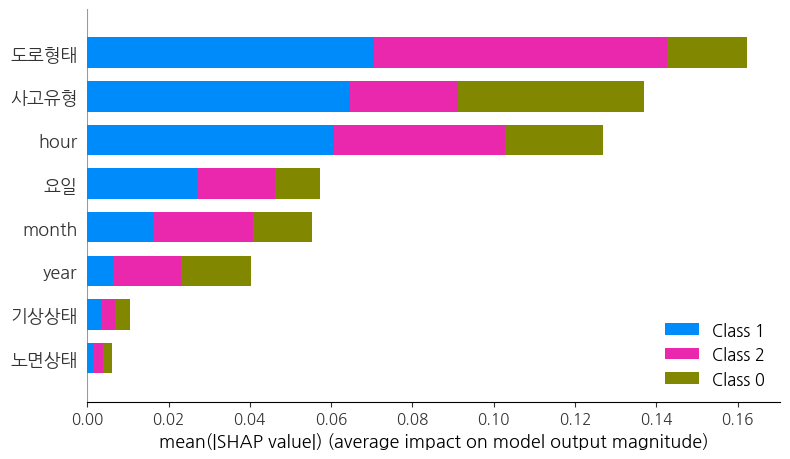

In [ ]:
import koreanize_matplotlib

!pip install shap
import shap

# SHAP 값을 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x)

# SHAP summary plot
shap.summary_plot(shap_values, test_x)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_test.iloc[0, :])

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


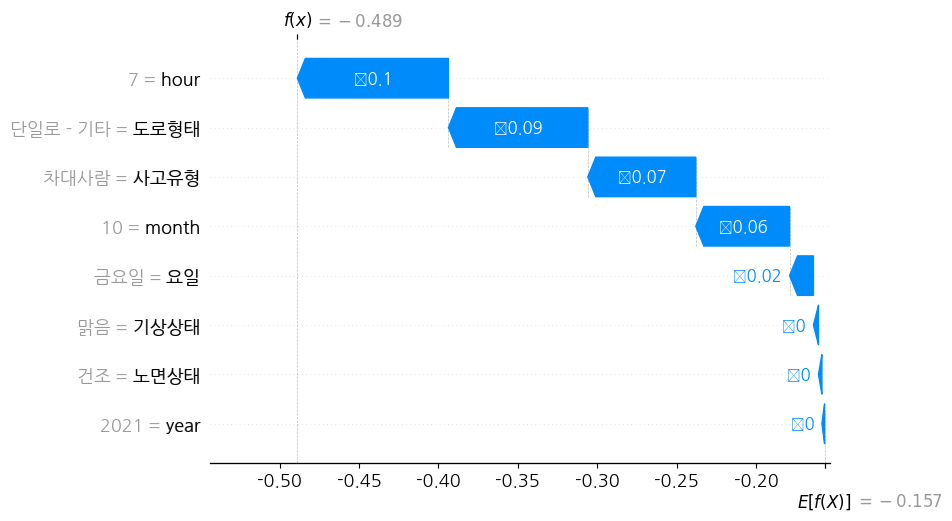

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=test_x.iloc[0,:]))


In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 26669, number of used features: 162
[LightGBM] [Info] Start training from score -0.744975
[LightGBM] [Info] Start training from score -1.291254
[LightGBM] [Info] Start training from score -1.384983


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.7514324950170578
macro F1 Score: 0.7474276149353113
Accuracy: 0.7564499484004128
Macro Precision: 0.7832842498325926
              precision    recall  f1-score   support

  Cautionary       0.71      0.85      0.77      1381
   dangerous       0.83      0.55      0.66       783
        safe       0.81      0.81      0.81       743

    accuracy                           0.76      2907
   macro avg       0.78      0.73      0.75      2907
weighted avg       0.77      0.76      0.75      2907



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 탐색 대상 하이퍼 파라미터 공간 설정
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    # 'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
}

# StratifiedKFold를 사용한 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV를 사용하여 교차 검증 및 그리드 서치 진행
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(x_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델을 사용하여 테스트 데이터 예측
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 21335, number of used features: 146
[LightGBM] [Info] Start training from score -0.744946
[LightGBM] [Info] Start training from score -1.291176
[LightGBM] [Info] Start training from score -1.385123
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 21335, n

In [ ]:
# 최적의 모델을 사용하여 테스트 데이터 예측
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)

In [ ]:
!pip install shap
import shap

In [ ]:
# SHAP 값 계산
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(test_x)

LightGBMError: ignored

In [ ]:
# '시군구_'로 시작하는 모든 열을 제거
columns_to_remove = [col for col in test_x.columns if col.startswith('시군구_')]
test_x = test_x.drop(columns=columns_to_remove, axis=1)

Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
Glyph 45909 (\N{HANGUL SYLLABLE DEOG}) missing from current font.
Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
Glyph 51021 (\N{HAN

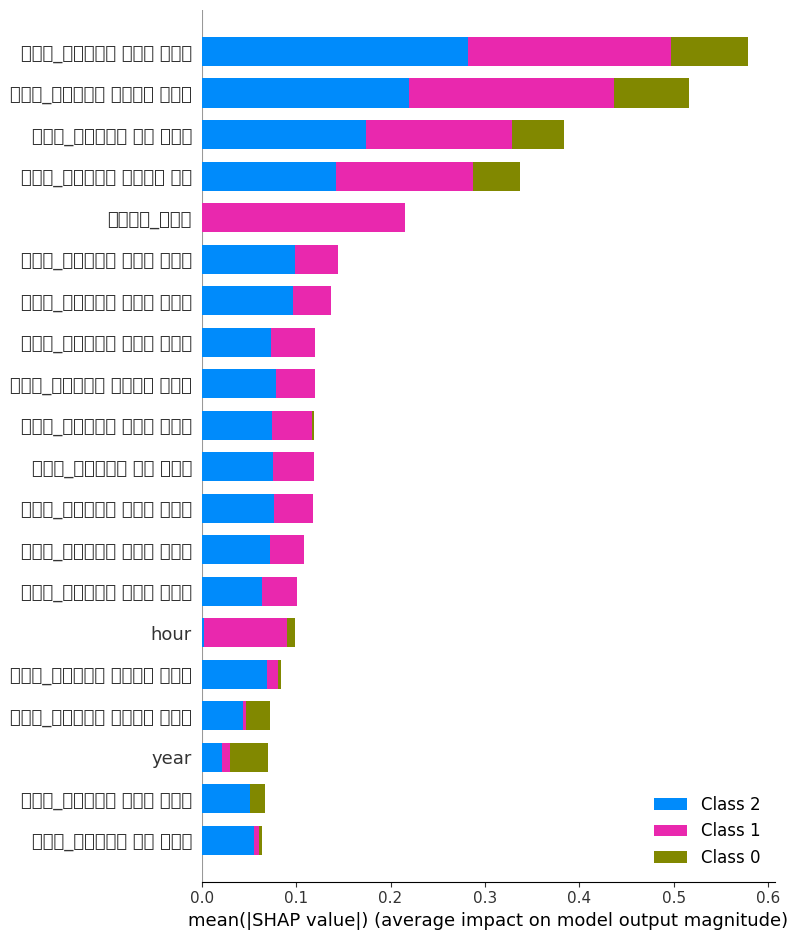

In [ ]:
shap.summary_plot(shap_values, test_x)

In [ ]:
sample_index = 0  # 특정 사례의 인덱스
shap.force_plot(explainer.expected_value, shap_values[sample_index, :], X_test.iloc[sample_index, :])

TypeError: ignored

Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
Glyph 44592 (\N{HA

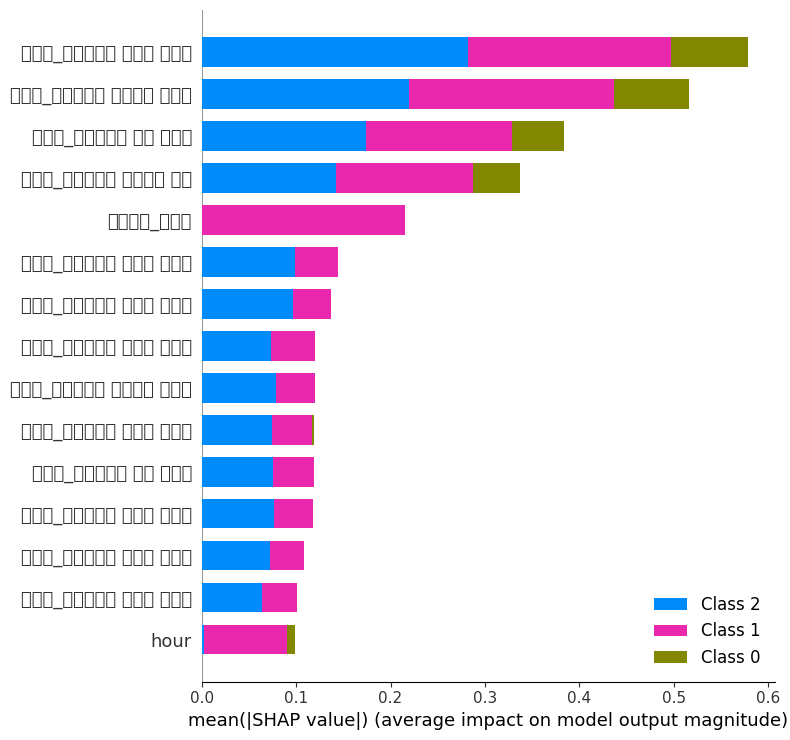

In [ ]:
# 법규위반 특성의 SHAP summary plot
shap.summary_plot(shap_values, test_x, plot_type="bar", feature_names=test_x.columns, max_display=15)